In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#now load the dataset
cocacola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.83
1,Q2_86,2244.96
2,Q3_86,2533.80
3,Q4_86,2154.96
4,Q1_87,1547.82


<Axes: >

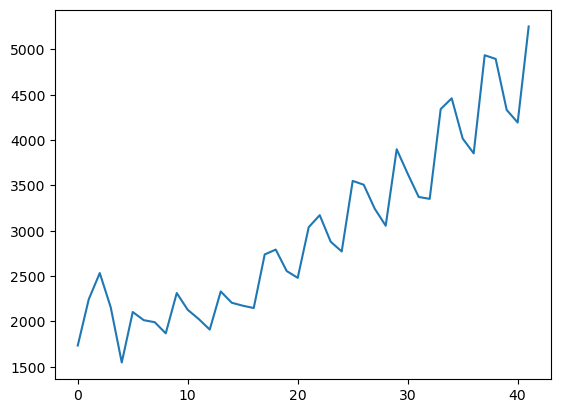

In [4]:
#let us plot the dataset abd its nature
cocacola.Sales.plot()

In [5]:
#Splitting the data into train and test set data
#since we are working on quarterly datasets and in year there are 4 quarters
#Test data=4 quarters
#Train Data=38

In [6]:
Train=cocacola.head(38)

In [7]:
Train

,Quarter,Sales
0,Q1_86,1734.83
1,Q2_86,2244.96
2,Q3_86,2533.80
3,Q4_86,2154.96
4,Q1_87,1547.82
5,Q2_87,2104.41
6,Q3_87,2014.36
7,Q4_87,1991.75
8,Q1_88,1869.05
9,Q2_88,2313.63


In [8]:
Test=cocacola.tail(4)
Test

,Quarter,Sales
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [9]:
#Here we  are considerong performance parameters as mean absolute percentage errors rather than meann square error

#Custome function is written to calculate MPSE

In [10]:
def MAPE (pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

    
#EDA which comprises identification of level, trends and seasonality
#In order to separate Trend and Seasonality moving avg can be done

In [11]:
mv_pred=cocacola['Sales'].rolling(4).mean()
mv_pred.tail(4)

38    4425.50
39    4504.50
40    4589.50
41    4668.75
Name: Sales, dtype: float64

In [12]:
#This calculates a 4-period moving avg for the sales column.
#It smooths the data by taking the mean of the last 4 quarters at each point,
#Now let us calculate mean absolute percentage of these values

In [13]:
MAPE(mv_pred.tail(4),Test.Sales)

8.525442688640576

In [14]:
# Moving Avg helps to extract trend & seasonality MAPE evaluates prediction accuracy
# If MAPE is low , the model is performing well
# Moving avg is predicting complete values, out of which last 4 are considered as predicted values and last four values of Test.Sales
#Basic purpose of moving average is deseasonalizing

<Axes: >

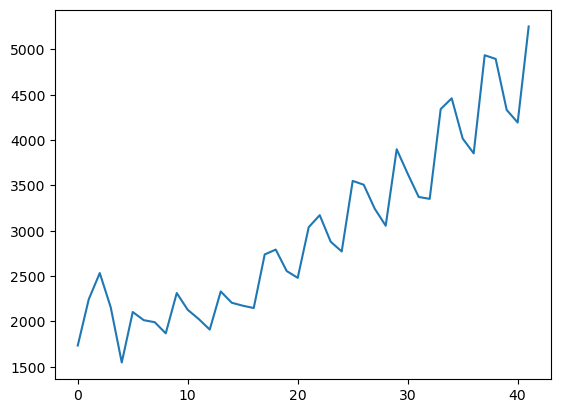

In [15]:
cocacola.Sales.plot(label='org')

In [16]:
#This is original plot
#Now let us separate out Trend and Seasonality

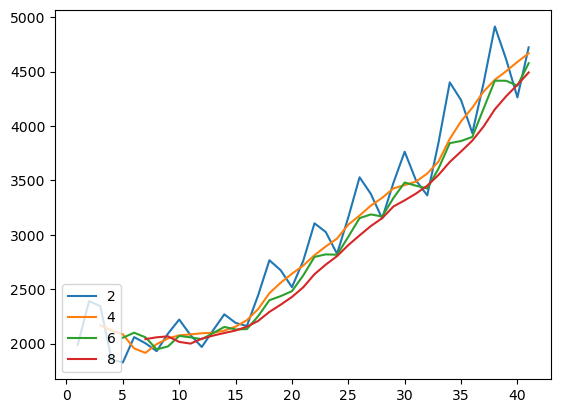

In [17]:
for i in range(2,9,2):
    #it will take window size 2,4,6,8
    cocacola['Sales'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=3)

In [18]:
#You can see i=4 and 8 are deseasonality plots

In [19]:
#Time Series decomposition is the another technique of separating data interms seasonality

0            NaN
1            NaN
2     2143.76125
3     2102.81625
4     2020.31750
5     1934.98625
6     1954.73875
7     2021.04500
8     2061.44250
9     2080.07250
10    2089.65125
11    2097.03625
12    2109.00625
13    2137.17750
14    2185.28000
15    2266.00875
16    2390.30250
17    2511.33250
18    2600.67375
19    2679.78625
20    2764.73375
21    2852.52875
22    2929.28125
23    3029.47000
24    3135.26500
25    3222.85750
26    3303.96500
27    3383.09000
28    3441.84000
29    3473.10750
30    3526.25000
31    3618.62500
32    3778.00000
33    3962.50000
34    4105.75000
35    4242.75000
36    4371.25000
37    4465.00000
38    4547.00000
39    4629.12500
40           NaN
41           NaN
Name: trend, dtype: float64
0    -345.292740
1     287.696705
2     192.544080
3    -134.948045
4    -345.292740
5     287.696705
6     192.544080
7    -134.948045
8    -345.292740
9     287.696705
10    192.544080
11   -134.948045
12   -345.292740
13    287.696705
14    192.544080
15 

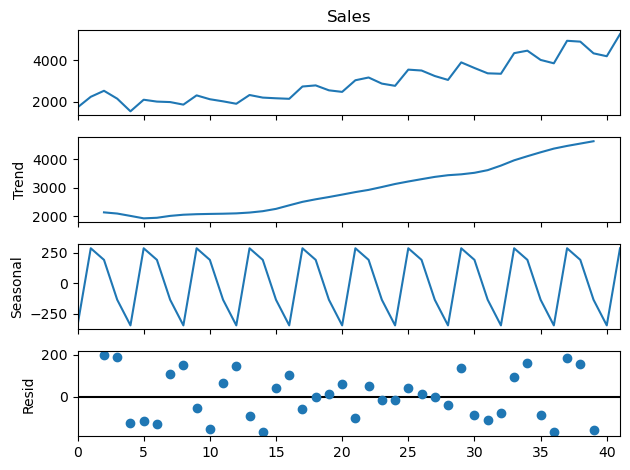

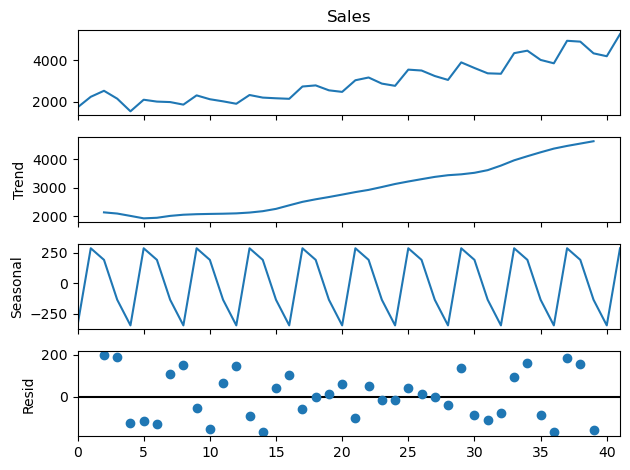

In [20]:
decompose_ts_add=seasonal_decompose(cocacola.Sales,model="additive",period=4)
print(decompose_ts_add.trend)
print(decompose_ts_add.seasonal)
print(decompose_ts_add.resid)
print(decompose_ts_add.observed)
decompose_ts_add.plot()

In [21]:
"""
Trend Component

There is a visible upward trennd in sales over time,indicating overall growth.

Seasonal Component

A clear repeating pattern is visible every four quarters (one year),
confirming strong seasonality in sales.

Resudual Component

The residual (random fluctuations)should ideally be white noise.
If they show patterns , it suggests that other factors might be influencing sales
"""

'\nTrend Component\n\nThere is a visible upward trennd in sales over time,indicating overall growth.\n\nSeasonal Component\n\nA clear repeating pattern is visible every four quarters (one year),\nconfirming strong seasonality in sales.\n\nResudual Component\n\nThe residual (random fluctuations)should ideally be white noise.\nIf they show patterns , it suggests that other factors might be influencing sales\n'

In [22]:
#similar plot can be decomposed using multiplicative

0            NaN
1            NaN
2     2143.76125
3     2102.81625
4     2020.31750
5     1934.98625
6     1954.73875
7     2021.04500
8     2061.44250
9     2080.07250
10    2089.65125
11    2097.03625
12    2109.00625
13    2137.17750
14    2185.28000
15    2266.00875
16    2390.30250
17    2511.33250
18    2600.67375
19    2679.78625
20    2764.73375
21    2852.52875
22    2929.28125
23    3029.47000
24    3135.26500
25    3222.85750
26    3303.96500
27    3383.09000
28    3441.84000
29    3473.10750
30    3526.25000
31    3618.62500
32    3778.00000
33    3962.50000
34    4105.75000
35    4242.75000
36    4371.25000
37    4465.00000
38    4547.00000
39    4629.12500
40           NaN
41           NaN
Name: trend, dtype: float64
0     0.878870
1     1.096101
2     1.064338
3     0.960691
4     0.878870
5     1.096101
6     1.064338
7     0.960691
8     0.878870
9     1.096101
10    1.064338
11    0.960691
12    0.878870
13    1.096101
14    1.064338
15    0.960691
16    0.878870
17 

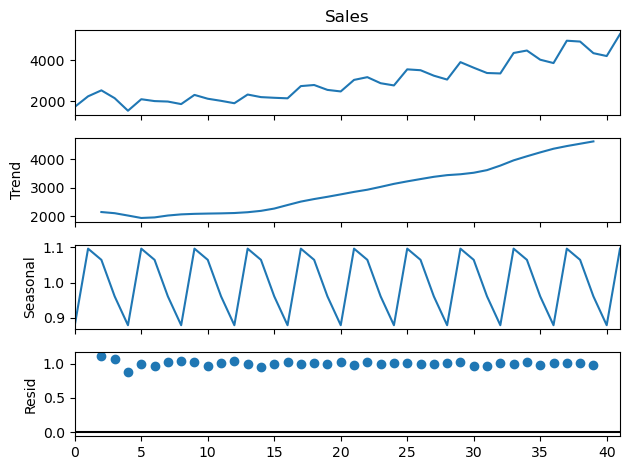

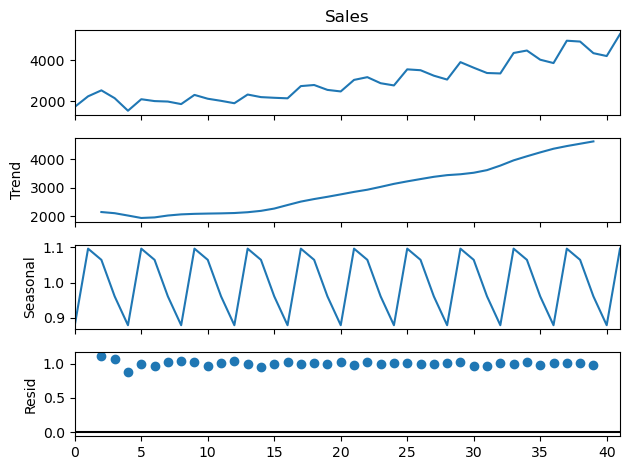

In [23]:
decompose_ts_mul=seasonal_decompose(cocacola.Sales,model="multiplicative",period=4)
print(decompose_ts_mul.trend)
print(decompose_ts_mul.seasonal)
print(decompose_ts_mul.resid)
print(decompose_ts_mul.observed)
decompose_ts_mul.plot()

In [24]:
#you can obeserve differnce between these plots

# Now let us plot ACF plot to check the auto correlation

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [30]:
ses_model=SimpleExpSmoothing(Train['Sales']).fit()

In [31]:
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])

In [32]:
#Now calculate MAPE

In [33]:
MAPE(pred_ses,Test.Sales)

8.30789775441469

In [34]:
#we are getting 8.30789775441469

# Holts winter exponential Smoothing

In [36]:
hw_model=Holt(Train['Sales']).fit()

In [38]:
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])

In [39]:
#Now calculate MAPE

In [41]:
MAPE(pred_hw,Test.Sales)

9.809783428618136

In [42]:
#we are getting 9.809783428618136

# Holts winter exponential smoothing with additive seasonality

In [45]:
hwe_model_add_add=ExponentialSmoothing(Train['Sales'],seasonal='add',trend='add',seasonal_periods=4).fit()

In [46]:
pred_hwe_model_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])

In [47]:
MAPE(pred_hwe_model_add_add,Test.Sales)

1.5022364186549284

In [48]:
#1.5022364186549284

# Holts winter Exponential smoothing With multiplicative seasonality

In [50]:
hwe_model_mul_add=ExponentialSmoothing(Train['Sales'],seasonal='mul',trend='add',seasonal_periods=4).fit()

In [51]:
pred_hwe_model_mul_add=hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])

In [52]:
MAPE(pred_hwe_model_mul_add,Test.Sales)

2.4437125174631698

In [53]:
#2.4437125174631698

# Let us apply complete data of cocacola

In [55]:
#We have seen that hwe_model_add_add has got lowest, hence it is selected

In [56]:
hwe_model_add_add=ExponentialSmoothing(cocacola['Sales'],seasonal='add',trend='add',seasonal_periods=4).fit()

In [57]:
#import the new dataset for which prediction has to be done

In [66]:
new_data=pd.read_excel('CocaCola_Sales_New_Pred.xlsx')

In [67]:
newdata_pred=hwe_model_add_add.predict(start=new_data.index[0],end=new_data.index[-1])

In [68]:
MAPE(newdata_pred,Test.Sales)

2.47738666113748

In [69]:
newdata_pred

0     1756.132289
1     2220.990371
2     2287.026828
3     2244.742080
4     1868.321748
5     2222.788462
6     2296.021649
7     1867.570567
8     1450.411384
9     2179.730640
10    2318.525692
11    2108.146053
12    1737.424323
13    2267.643651
14    2257.012900
15    2148.757433
16    1927.863405
17    2453.592475
18    2520.599465
19    2620.960469
20    2484.264430
21    2978.809290
22    2970.001915
23    2931.647831
24    2836.358736
25    3340.219555
26    3461.905858
27    3277.603182
28    3196.001971
29    3776.590998
30    3803.246233
31    3487.729916
32    3314.590616
33    4053.010161
34    4038.428338
35    4022.134518
36    3997.969747
37    4795.363347
38    4799.346700
39    4502.690720
40    4357.450596
41    5245.543093
42    5165.150346
43    4711.298652
44    4624.681243
45    5637.801258
46    5554.474429
47    5100.622736
dtype: float64